# Examples

### Code snippets for illustrating some of *cryptoast*'s core features

note: prefer viewing the notebook on nbviewer
https://nbviewer.org/github/GuillaumeDMMarion/crypto-invest/blob/master/notebooks/Examples.ipynb

---

### Import Libraries

#### installed

In [1]:
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from s3fs.core import S3FileSystem
from binance.client import Client

In [2]:
init_notebook_mode(connected=True)

#### cryptoast

In [3]:
sys.path.append(os.path.dirname(os.getcwd()))

In [6]:
from cryptoast.utils.cred import Cred
from cryptoast.base.kline import Kline
from cryptoast.base.klines import Klines, KLMngr

### Initialize

In [8]:
cred=Cred()

In [54]:
bases = ['BTC', 'ETH', 'ADA', 'DOT', 'XRP', 'UNI', 'LTC', 'LINK', 'BCH', 'XLM', 'VET', 'IOTA', 'TRX']
quotes_or_assets = [_+'USDT' for _ in bases]
quotes_or_assets += ['ADABTC', 'XRPBTC']

#### Local filesystem - No exchange client

#### Remote filesystem - No exchange client

In [55]:
root_path = 'admin-invest/'
iam_key, iam_secret = cred.get('IAM')
s3 = S3FileSystem(anon=False, key=iam_key, secret=iam_secret)
url_scheme = s3.open

client = Client("a","b")

klmngr = KLMngr(quotes_or_assets=quotes_or_assets, client=client, url_scheme=url_scheme, root_path=root_path)

#### Remote filesystem -  With exchange client

### Kline features

#### General

Definition

In [71]:
kline = klmngr['ETHUSDT']

Asset

In [63]:
kline.asset

'ETHUSDT'

Info (available when selecting from KLNMngr object)

In [64]:
kline.info

base                           ETH
quote                         USDT
status                     TRADING
minPrice                    0.0100
maxPrice              1000000.0000
tickSize                    0.0100
minQty                      0.0001
maxQty                   9000.0000
stepSize                    0.0001
last_update    2021-11-06 08:00:00
Name: ETHUSDT, dtype: object

Representation

In [62]:
kline.tail()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,n/a
2021-11-06 04:00:00,1.636171e+12,4491.01,4498.87,4477.50,4495.00,6634.7413,1.636175e+12,2.980006e+07,18620.0,3706.7489,1.664879e+07,0.0
2021-11-06 05:00:00,1.636175e+12,4494.99,4515.00,4490.95,4507.02,9460.4250,1.636178e+12,4.260398e+07,30601.0,6010.4558,2.706800e+07,0.0
2021-11-06 06:00:00,1.636178e+12,4507.02,4513.43,4484.64,4489.11,7423.3068,1.636182e+12,3.338239e+07,21232.0,4135.4033,1.859674e+07,0.0
2021-11-06 07:00:00,1.636182e+12,4489.11,4491.79,4457.05,4471.72,10726.7442,1.636186e+12,4.795106e+07,27856.0,5076.9279,2.269850e+07,0.0
2021-11-06 08:00:00,1.636186e+12,4471.72,4474.21,4463.77,4468.09,915.8264,1.636189e+12,4.092727e+06,2635.0,478.6103,2.138979e+06,0.0


pandas.Series.plot

<AxesSubplot:>

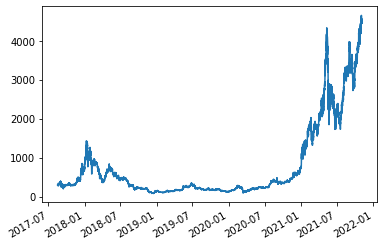

In [111]:
kline.close.plot()

#### Update

Get latest data

In [66]:
kline.update(client=client, store=False)

In [68]:
kline.tail()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,n/a
2021-11-06 05:00:00,1.636175e+12,4494.99,4515.00,4490.95,4507.02,9460.4250,1.636178e+12,4.260398e+07,30601.0,6010.4558,2.706800e+07,0.0
2021-11-06 06:00:00,1.636178e+12,4507.02,4513.43,4484.64,4489.11,7423.3068,1.636182e+12,3.338239e+07,21232.0,4135.4033,1.859674e+07,0.0
2021-11-06 07:00:00,1.636182e+12,4489.11,4491.79,4457.05,4471.72,10726.7442,1.636186e+12,4.795106e+07,27856.0,5076.9279,2.269850e+07,0.0
2021-11-06 08:00:00,1.636186e+12,4471.72,4495.67,4463.28,4471.15,11474.2216,1.636189e+12,5.140488e+07,27783.0,5802.5287,2.599594e+07,0.0
2021-11-06 09:00:00,1.636189e+12,4471.14,4478.02,4463.04,4469.60,1145.6640,1.636193e+12,5.119568e+06,3194.0,496.4695,2.218806e+06,0.0


#### Indicators
Classic financial time-series indicators based on ta package.

Base

In [78]:
kline.indicators.tail()

,sma_50,sma_200,ema_12,ema_26,wma_9,macd_12_26,macd_sign_12_26,macd_diff_12_26,adx,adx_pos,...,obv,psar,psarup,psardown,roc,stoch_k,stoch_k_signal,vwap_14,d_ret,d_logret
2021-11-06 05:00:00,4505.1118,4414.18205,4491.061315,4495.068512,4492.947556,-4.007197,-7.632851,3.625655,14.449400,16.571672,...,9.448206e+06,4450.946071,4450.946071,NaN,0.537596,40.282423,-0.230045,4481.008514,0.267408,0.267051
2021-11-06 06:00:00,4503.3154,4415.37480,4490.761113,4494.627140,4493.262000,-3.866028,-6.879487,3.013459,13.485171,15.581593,...,9.440783e+06,4454.789306,4454.789306,NaN,-0.261504,16.833891,14.850037,4482.085289,-0.397380,-0.398172
2021-11-06 07:00:00,4501.9552,4416.30330,4487.831711,4492.930315,4489.488222,-5.098604,-6.523310,1.424706,13.749158,14.459018,...,9.430056e+06,4515.000000,NaN,4515.00000,-0.517909,-85.693051,-9.525579,4481.238653,-0.387382,-0.388134
2021-11-06 08:00:00,4499.9396,4416.89400,4485.265294,4491.316958,4485.786444,-6.051665,-6.428981,0.377316,13.791599,14.291720,...,9.418582e+06,4513.841000,NaN,4513.84100,0.505771,-62.541806,-43.800322,4479.855334,-0.012747,-0.012748
2021-11-06 09:00:00,4499.0084,4417.47645,4482.855249,4489.708295,4481.843333,-6.853046,-6.513794,-0.339252,13.840861,13.827146,...,9.417436e+06,4512.705180,NaN,4512.70518,0.178185,-51.655172,-66.630010,4478.949587,-0.034667,-0.034673


Compute new indicators with different parameters.

In [108]:
new_indicator = kline.indicators.compute('sma', 150)

Compute but also append the indicator to the existing ones.

In [98]:
# The indicatorsjar is the non re-indexed data object.
kline.indicatorsjar.extend('sma', 150)

In [110]:
all(kline.indicators.iloc[:, [-1]] == new_indicator)

True

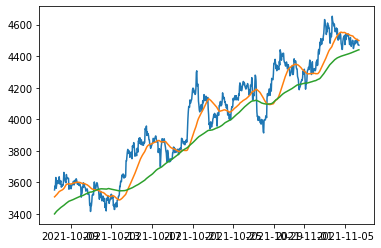

In [107]:
plt.plot(kline.close[-24*30:])
plt.plot(kline.indicators.sma_50[-24*30:])
plt.plot(kline.indicators.sma_150[-24*30:])

#### Signals
Common signals based on available indicators.

In [115]:
kline.signals.tail()

,pairedcross_sma_50_sma_200,slopecarry_sma_50_2,closecross_sma_50,macdcap_12_26,rsicap_30_70,adxcap_25,atrcross_sma_50_0.04,bbcross_0.98,cmfcap_0.1,dccross_0.98,kccross_1.0,mficap_20_80_14,psarcross,roccap_-5_5,stochcap_-80_80_3,vwapcross_14
2021-11-06 05:00:00,0.0,-1.0,1.0,-1.0,-0.0,0.0,1,1.0,0.0,1.0,0.0,-0.0,1.0,0.0,-0.0,1.0
2021-11-06 06:00:00,0.0,-1.0,-1.0,-1.0,-0.0,0.0,1,1.0,0.0,1.0,0.0,-0.0,1.0,0.0,-0.0,1.0
2021-11-06 07:00:00,0.0,-1.0,-1.0,-1.0,-0.0,0.0,1,-1.0,0.0,-1.0,-0.0,-0.0,-1.0,0.0,-0.0,1.0
2021-11-06 08:00:00,0.0,-1.0,-1.0,-1.0,-0.0,0.0,1,-1.0,0.0,-1.0,-0.0,-0.0,-1.0,0.0,-0.0,-0.0
2021-11-06 09:00:00,0.0,-1.0,-1.0,1.0,-0.0,0.0,1,-1.0,0.0,-1.0,-0.0,-0.0,-1.0,0.0,-0.0,-1.0


New signals can be computed, similarly to the indicators object. A raw representation can also be returned.

In [124]:
kline.signals.compute('closecross', 'sma_150')

2017-08-17 04:00:00    NaN
2017-08-17 05:00:00    NaN
2017-08-17 06:00:00    NaN
2017-08-17 07:00:00    NaN
2017-08-17 08:00:00    NaN
                      ... 
2021-11-06 05:00:00    1.0
2021-11-06 06:00:00    1.0
2021-11-06 07:00:00    1.0
2021-11-06 08:00:00    1.0
2021-11-06 09:00:00    1.0
Name: closecross_sma_150, Length: 36888, dtype: float64

In [125]:
kline.signals.compute('closecross', 'sma_150', raw=True)

2017-08-17 04:00:00         NaN
2017-08-17 05:00:00         NaN
2017-08-17 06:00:00         NaN
2017-08-17 07:00:00         NaN
2017-08-17 08:00:00         NaN
                         ...   
2021-11-06 05:00:00    0.015383
2021-11-06 06:00:00    0.011297
2021-11-06 07:00:00    0.007290
2021-11-06 08:00:00    0.007005
2021-11-06 09:00:00    0.006513
Name: closecross_sma_150, Length: 36888, dtype: float64

#### Plot
A wrapped (plotly) plotting function is available. Indicators as well as (buy or sell) signals can be plotted.

In [129]:
kline.plot(24*7, indicators=['sma_50'])

In [130]:
kline.plot(24*7, signals=kline.signals)

In [133]:
kline.plot(24*7, signals=kline.signals, signal_type='sell')

#### Resampling
One can resample the kline with the pandas.DataFrame.resample method or through pre-defined Kline methods.

In [147]:
kline_d = kline.daily

Most Kline methods remain available.

In [164]:
kline_d.plot(365, indicators=['sma_50', 'sma_200'], signals=kline_d.signals)

### Klines features

#### General

Represent the object as a dictionary.

In [13]:
klmngr

{ADAUSDT: <class 'Kline'>, BCHUSDT: <class 'Kline'>, BTCUSDT: <class 'Kline'>, DOTUSDT: <class 'Kline'>, ETHUSDT: <class 'Kline'>, IOTAUSDT: <class 'Kline'>, LINKUSDT: <class 'Kline'>, LTCUSDT: <class 'Kline'>, TRXUSDT: <class 'Kline'>, UNIUSDT: <class 'Kline'>, VETUSDT: <class 'Kline'>, XLMUSDT: <class 'Kline'>, XRPUSDT: <class 'Kline'>}

#### Print

Print each of the underlying assets' last logged close.

In [14]:
print(klmngr)

ADAUSDT: 1.99
BCHUSDT: 591.9
BTCUSDT: 60758.38
DOTUSDT: 50.54
ETHUSDT: 4468.09
IOTAUSDT: 1.3517
LINKUSDT: 32.03
LTCUSDT: 196.5
TRXUSDT: 0.10268
UNIUSDT: 25.41
VETUSDT: 0.15984
XLMUSDT: 0.3612
XRPUSDT: 1.1525


#### Iteration

Sorted key, value pairs.

In [21]:
asset, kline = klmngr.sorteditems()[0]

In [31]:
print(asset, kline[['open', 'high', 'low', 'close']].tail(), sep='\n')

ADAUSDT
                      open   high    low  close
2021-11-06 04:00:00  2.024  2.035  2.006  2.010
2021-11-06 05:00:00  2.010  2.040  2.009  2.027
2021-11-06 06:00:00  2.028  2.030  2.009  2.012
2021-11-06 07:00:00  2.013  2.018  1.983  1.997
2021-11-06 08:00:00  1.998  1.999  1.989  1.990


Unsorted listed values.

In [32]:
kline = klmngr.listedvalues()[0]

In [37]:
print(kline.asset)

BTCUSDT


In [38]:
print(kline[['open', 'high', 'low', 'close']].tail())

                         open      high       low     close
2021-11-06 04:00:00  61109.51  61280.23  60972.78  61193.63
2021-11-06 05:00:00  61193.64  61479.00  61193.63  61418.25
2021-11-06 06:00:00  61418.26  61560.49  61147.12  61249.99
2021-11-06 07:00:00  61250.00  61272.30  60511.01  60790.88
2021-11-06 08:00:00  60790.87  60804.11  60720.00  60758.38


List of the keys (assets), sorted.

In [39]:
klmngr.sortedkeys()

['ADAUSDT',
 'BCHUSDT',
 'BTCUSDT',
 'DOTUSDT',
 'ETHUSDT',
 'IOTAUSDT',
 'LINKUSDT',
 'LTCUSDT',
 'TRXUSDT',
 'UNIUSDT',
 'VETUSDT',
 'XLMUSDT',
 'XRPUSDT']

#### Select

Make a new Klines object based on a sub selection of quote(s) (default), base(s) or asset(s).

In [58]:
klmngr.select('BTC')

{ADABTC: <class 'Kline'>, XRPBTC: <class 'Kline'>}

In [57]:
klmngr.select(['ADA'], method='base')

{ADABTC: <class 'Kline'>, ADAUSDT: <class 'Kline'>}

In [59]:
klmngr.select(['ADABTC', 'BTCUSDT'], method='asset')

{ADABTC: <class 'Kline'>, BTCUSDT: <class 'Kline'>}

#### Reindex

One can reindex all underlying assets to a specific range.

In [213]:
date_range = pd.date_range('20211001', pd.Timestamp.now(), freq='H')

<AxesSubplot:>

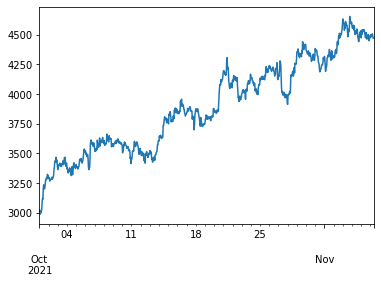

In [214]:
klmngr.reindex(date_range)['ETHUSDT'].close.plot()

#### Dynamic functions of each column of the underlying assets

Here we illustrate the method by using a simple round function. But this can be used for more advanced aggregate computations.

In [166]:
random_column = 'close'
help(getattr(klmngr, random_column))

Help on function close in module cryptoast.base.klines:

close(index=-1, func=<function mean at 0x0000016D4C417708>)
    Args:
        index (int/slice): Index or slice of the line(s) to include.
                func (function): Function to apply.
    
    Returns:
                func aggregate of close over the indicated index for all
              assets.



In [169]:
klmngr['ETHUSDT'].close

2017-08-17 04:00:00     301.61
2017-08-17 05:00:00     303.10
2017-08-17 06:00:00     302.68
2017-08-17 07:00:00     307.96
2017-08-17 08:00:00     308.62
                        ...   
2021-11-06 05:00:00    4507.02
2021-11-06 06:00:00    4489.11
2021-11-06 07:00:00    4471.72
2021-11-06 08:00:00    4471.15
2021-11-06 09:00:00    4469.60
Name: close, Length: 36888, dtype: float64

In [170]:
group_fun = lambda s: [round(_,3) for _ in s]

In [179]:
klmngr.close(index=slice(-6, None), func=group_fun)

{'ADABTC': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'ADAUSDT': [2.01, 2.027, 2.012, 1.997, 1.995, 1.991],
 'BCHUSDT': [598.5, 600.8, 599.9, 592.6, 592.3, 591.8],
 'BTCUSDT': [61109.52, 61193.63, 61418.25, 61249.99, 60790.88, 60758.38],
 'DOTUSDT': [51.12, 51.51, 51.15, 50.72, 50.78, 50.67],
 'ETHUSDT': [4495.0, 4507.02, 4489.11, 4471.72, 4471.15, 4469.6],
 'IOTAUSDT': [1.369, 1.372, 1.373, 1.357, 1.35, 1.349],
 'LINKUSDT': [32.38, 32.34, 32.3, 32.12, 32.08, 32.03],
 'LTCUSDT': [199.5, 200.0, 199.1, 197.2, 197.2, 196.7],
 'TRXUSDT': [0.103, 0.104, 0.104, 0.103, 0.103, 0.103],
 'UNIUSDT': [25.68, 25.73, 25.69, 25.53, 25.41, 25.34],
 'VETUSDT': [0.158, 0.16, 0.164, 0.16, 0.161, 0.161],
 'XLMUSDT': [0.362, 0.363, 0.363, 0.362, 0.361, 0.361],
 'XRPBTC': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'XRPUSDT': [1.166, 1.168, 1.165, 1.155, 1.157, 1.154]}

### KLMngr features

#### Initialization methods

Initialize a KLMngr from a list of quote strings.

In [183]:
KLMngr(quotes_or_assets=['BTC'], client=client, url_scheme=url_scheme, root_path=root_path)

{1INCHBTC: <class 'Kline'>, AAVEBTC: <class 'Kline'>, ACMBTC: <class 'Kline'>, ADABTC: <class 'Kline'>, ADXBTC: <class 'Kline'>, AEBTC: <class 'Kline'>, AERGOBTC: <class 'Kline'>, AGIBTC: <class 'Kline'>, AGIXBTC: <class 'Kline'>, AGLDBTC: <class 'Kline'>, AIONBTC: <class 'Kline'>, AKROBTC: <class 'Kline'>, ALGOBTC: <class 'Kline'>, ALICEBTC: <class 'Kline'>, ALPACABTC: <class 'Kline'>, ALPHABTC: <class 'Kline'>, AMBBTC: <class 'Kline'>, ANKRBTC: <class 'Kline'>, ANTBTC: <class 'Kline'>, APPCBTC: <class 'Kline'>, ARBTC: <class 'Kline'>, ARDRBTC: <class 'Kline'>, ARKBTC: <class 'Kline'>, ARNBTC: <class 'Kline'>, ARPABTC: <class 'Kline'>, ASRBTC: <class 'Kline'>, ASTBTC: <class 'Kline'>, ATABTC: <class 'Kline'>, ATMBTC: <class 'Kline'>, ATOMBTC: <class 'Kline'>, AUCTIONBTC: <class 'Kline'>, AUDIOBTC: <class 'Kline'>, AUTOBTC: <class 'Kline'>, AVABTC: <class 'Kline'>, AVAXBTC: <class 'Kline'>, AXSBTC: <class 'Kline'>, BADGERBTC: <class 'Kline'>, BAKEBTC: <class 'Kline'>, BALBTC: <class 'K

Initialize a KLMngr from list of asset strings.

In [184]:
KLMngr(quotes_or_assets=['ADABTC', 'ADAUSDT'], client=client, url_scheme=url_scheme, root_path=root_path)

{ADABTC: <class 'Kline'>, ADAUSDT: <class 'Kline'>}

Initialize a KLMngr from multiple Kline objects

In [185]:
KLMngr(klines=[Kline('ADAUSDT'), Kline('BATUSDT')], client=client, url_scheme=url_scheme, root_path=root_path)

{ADAUSDT: <class 'Kline'>, BATUSDT: <class 'Kline'>}

#### Info

In [181]:
klmngr.info

,base,quote,status,minPrice,maxPrice,tickSize,minQty,maxQty,stepSize,last_update
symbol,,,,,,,,,,
ETHBTC,ETH,BTC,TRADING,0.000001,922327.0,0.000001,0.0001,100000.0,0.0001,2021-02-18 16:00:00
LTCBTC,LTC,BTC,TRADING,0.000001,100000.0,0.000001,0.0010,100000.0,0.0010,2021-02-18 16:00:00
BNBBTC,BNB,BTC,TRADING,0.000001,100000.0,0.000001,0.0010,100000.0,0.0010,NaT
NEOBTC,NEO,BTC,TRADING,0.000001,100000.0,0.000001,0.0100,100000.0,0.0100,2021-02-18 16:00:00
QTUMETH,QTUM,ETH,TRADING,0.000001,1000.0,0.000001,0.1000,90000000.0,0.1000,NaT
...,...,...,...,...,...,...,...,...,...,...
MANATRY,MANA,TRY,TRADING,0.010000,10000.0,0.010000,0.1000,9222449.0,0.1000,NaT
ALGORUB,ALGO,RUB,TRADING,0.100000,100000.0,0.100000,0.1000,922327.0,0.1000,NaT
SHIBUAH,SHIB,UAH,TRADING,0.000001,1000.0,0.000001,1.0000,92141578.0,1.0000,NaT


#### Update

Get latest data for all assets.

In [35]:
klmngr.update()

#### Bull-market-percentage

Either compute it independently and add as argument to the plotter, or do not precompute.

In [243]:
klmngr = KLMngr(quotes_or_assets=selection, client=client, url_scheme=url_scheme, root_path=root_path)

In [245]:
bmp = klmngr.get_bmp()

<AxesSubplot:>

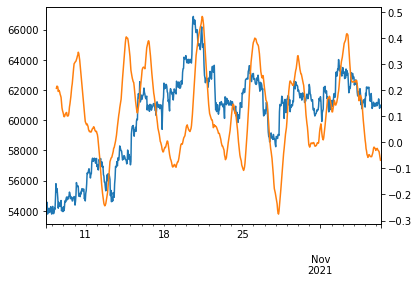

In [268]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
klmngr['BTCUSDT'][-24*30:].close.plot(ax=ax)
bmp[-24*30:].rolling(24).mean().plot(ax=ax2, c='C1')